In [62]:
from google.colab import files
uploaded = files.upload()

Saving Invistico_Airline.csv.zip to Invistico_Airline.csv (5).zip


In [63]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

with zipfile.ZipFile('Invistico_Airline.csv.zip')as z:
  with z.open('Invistico_Airline.csv')as f:
    flight_df = pd.read_csv(f)

flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [64]:
missing_values = flight_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [65]:
missing_info = flight_df['Arrival Delay in Minutes'].isnull().sum()
print(f"\nMissing in 'Arrival Delay in Minutes':, {missing_info}")


Missing in 'Arrival Delay in Minutes':, 393


In [66]:
flight_df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


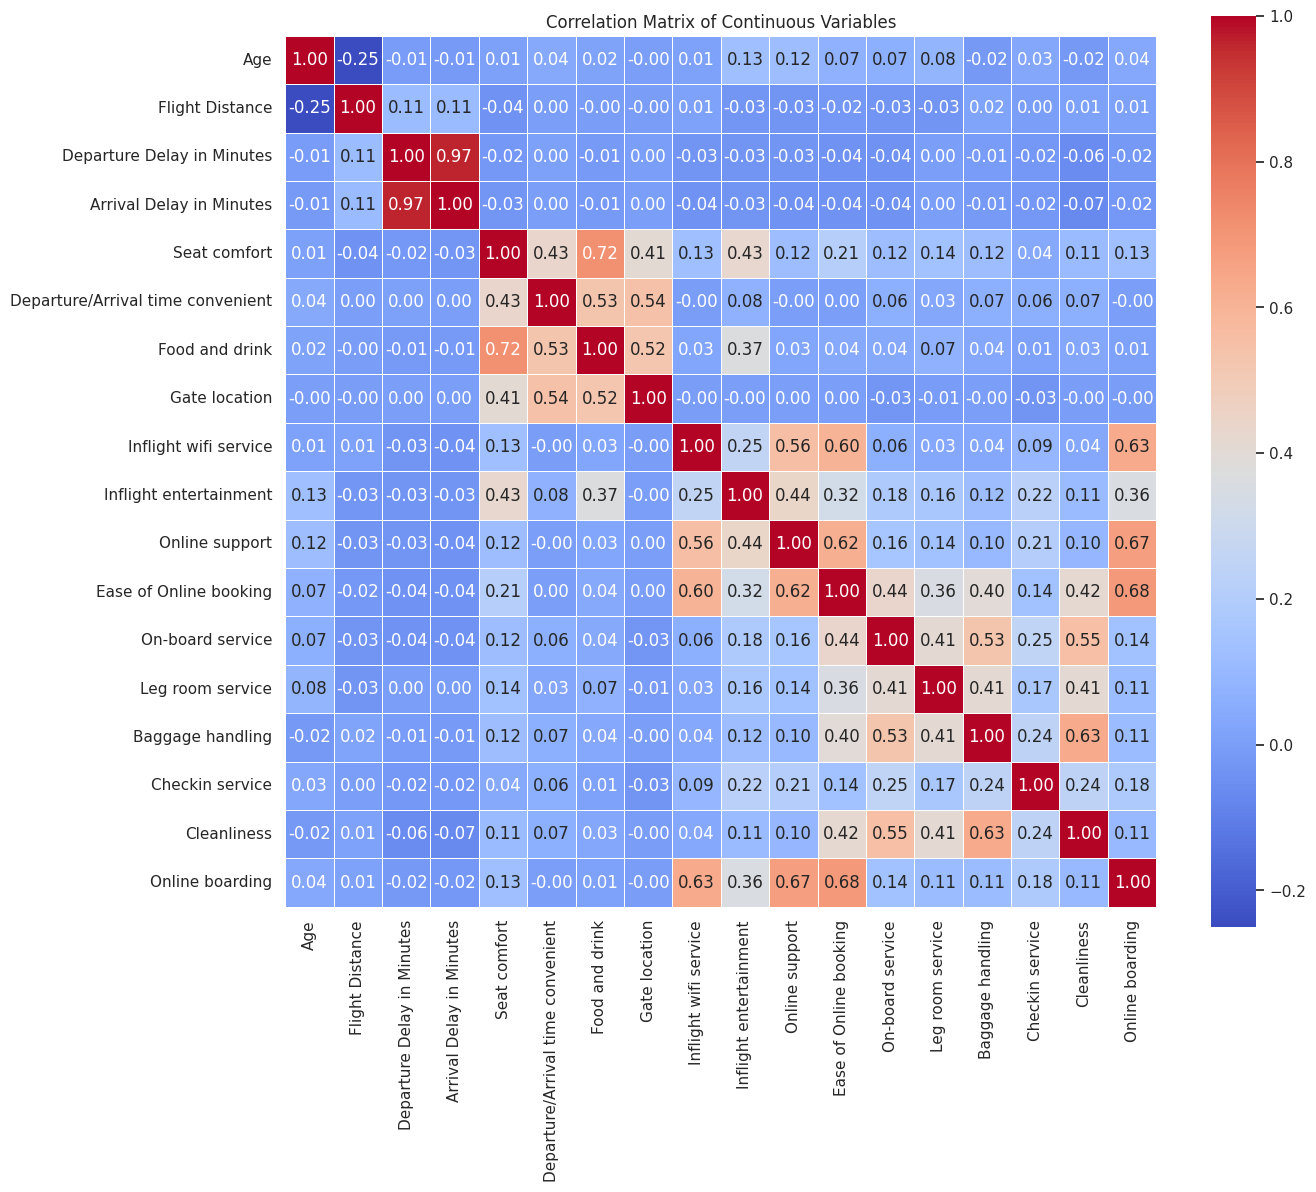

In [67]:
# Identify continuous/numeric columns
# Includes both rating-based and truly continuous variables
continuous_cols = [
    'Age',
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Seat comfort',
    'Departure/Arrival time convenient',
    'Food and drink',
    'Gate location',
    'Inflight wifi service',
    'Inflight entertainment',
    'Online support',
    'Ease of Online booking',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Cleanliness',
    'Online boarding'
]

# Compute the correlation matrix
corr_matrix = df[continuous_cols].corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Continuous Variables")
plt.tight_layout()
plt.show()

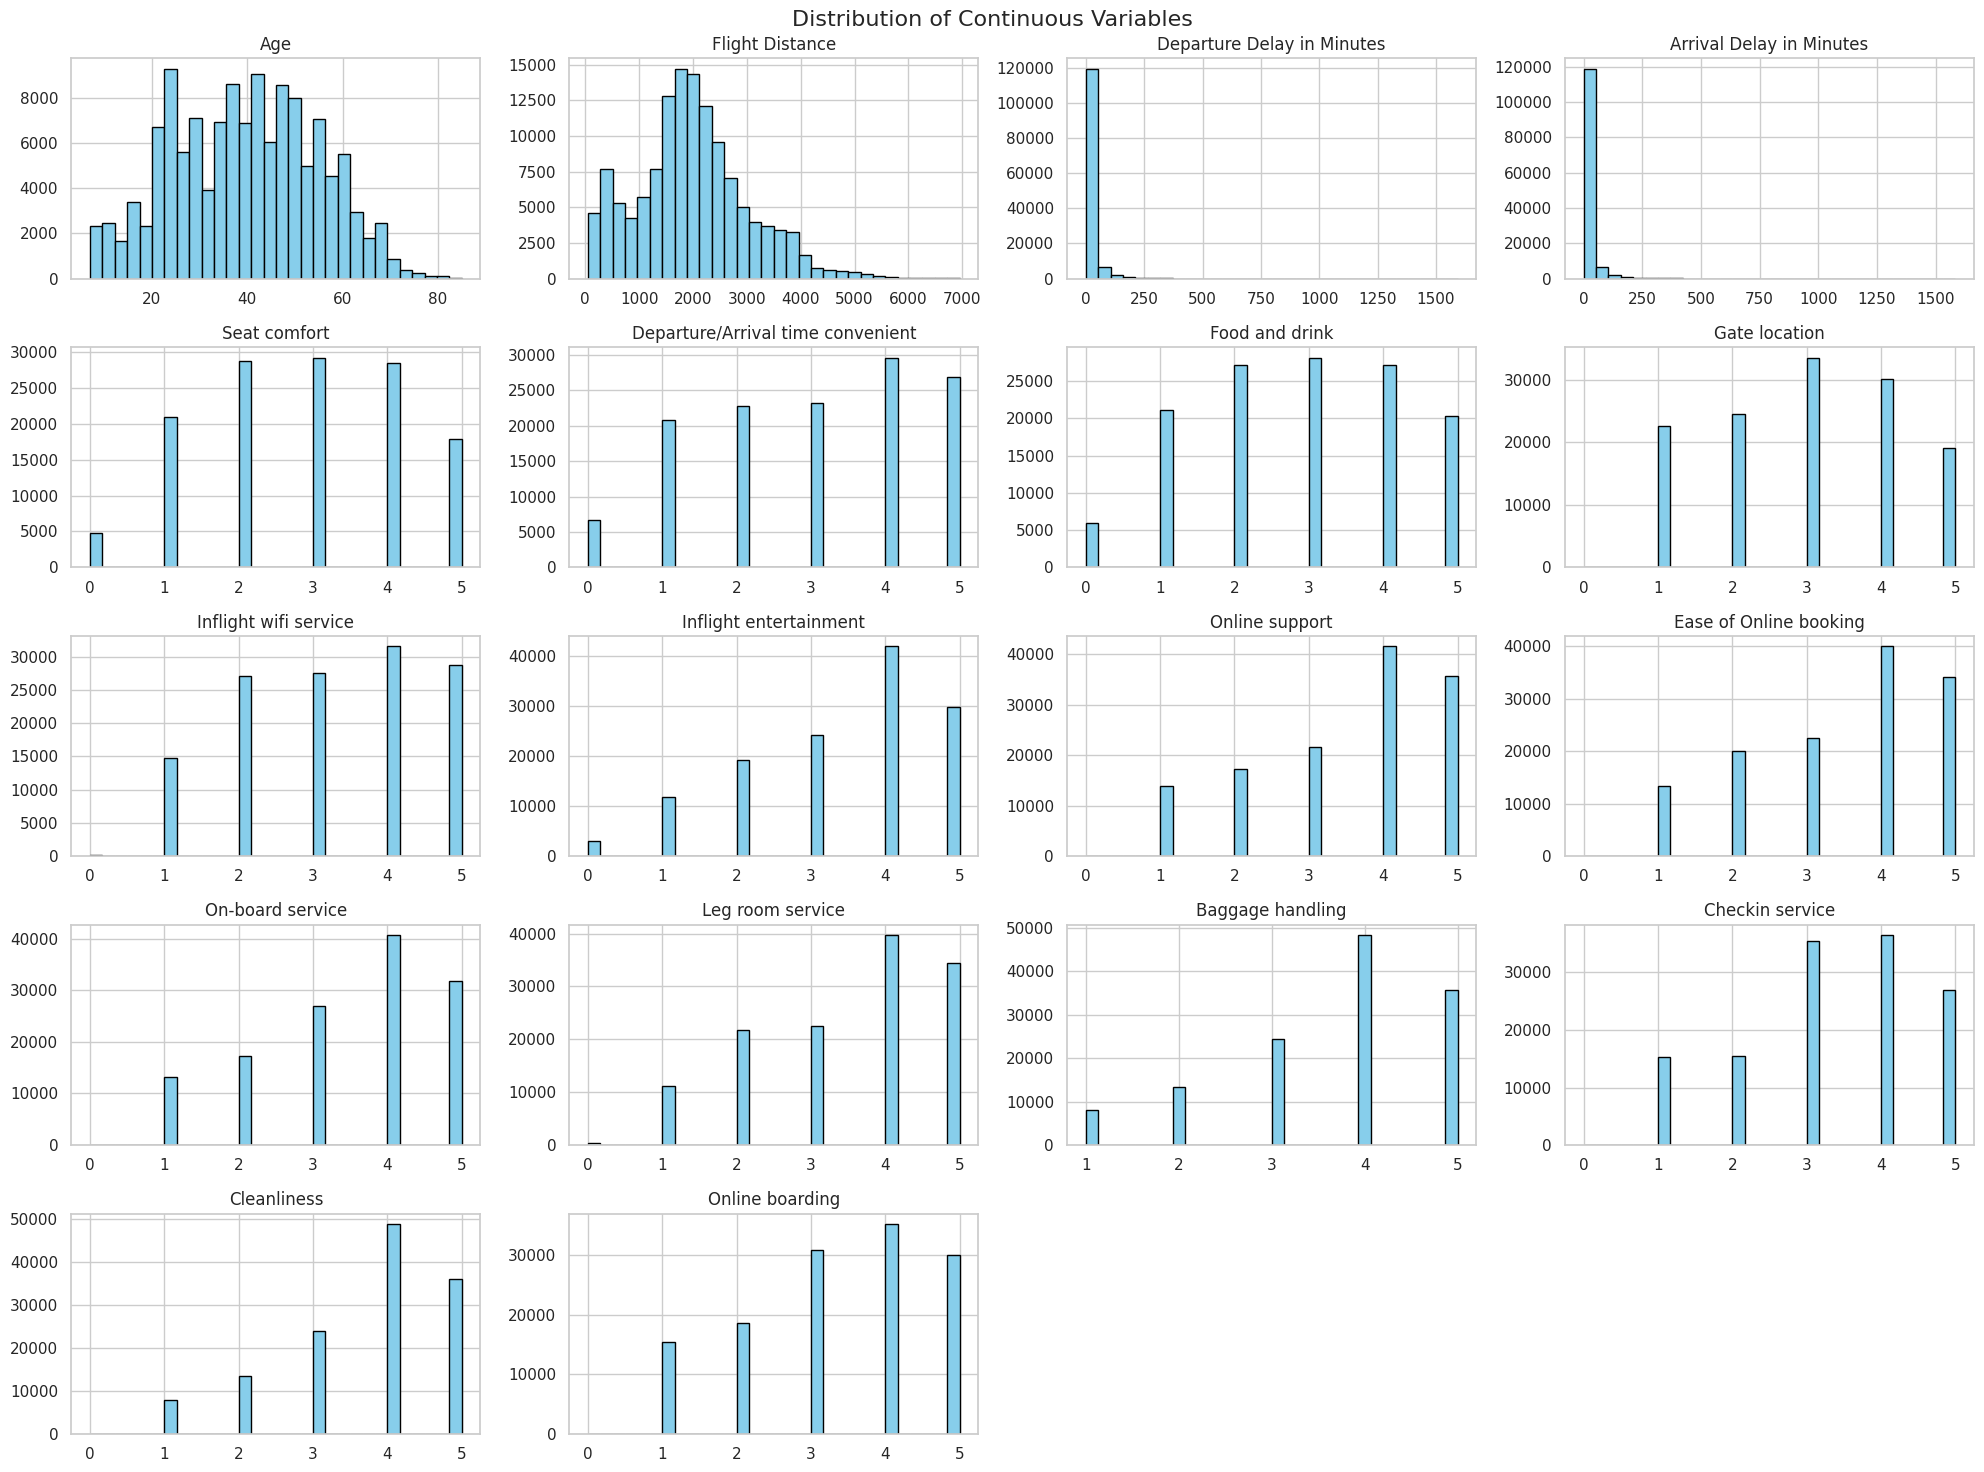

In [68]:
# List of continuous variables
continuous_cols = [
    'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
    'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
    'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support',
    'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Cleanliness', 'Online boarding'
]

# Plot histograms
df[continuous_cols].hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Continuous Variables", fontsize=16)
plt.tight_layout()
plt.show()

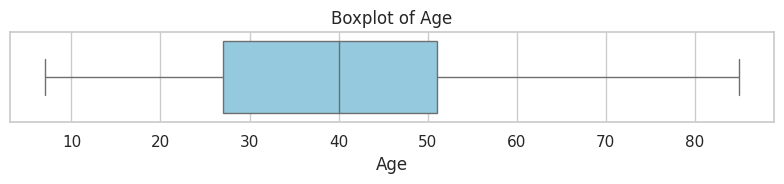

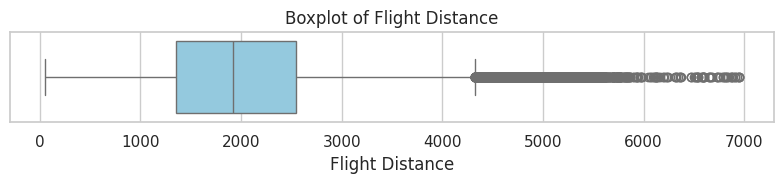

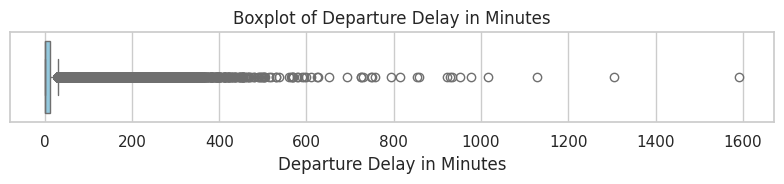

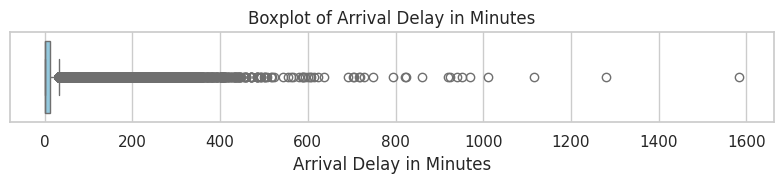

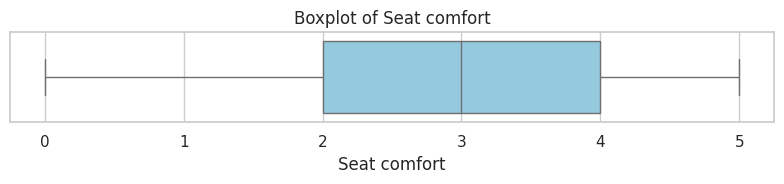

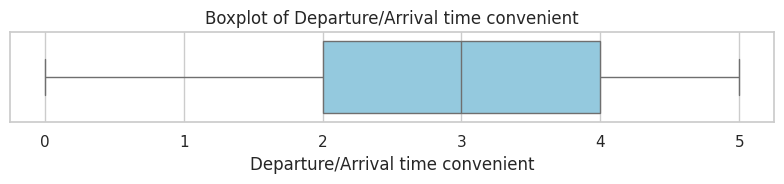

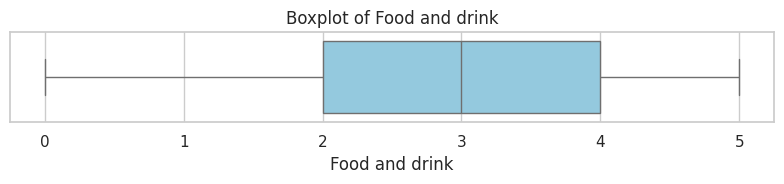

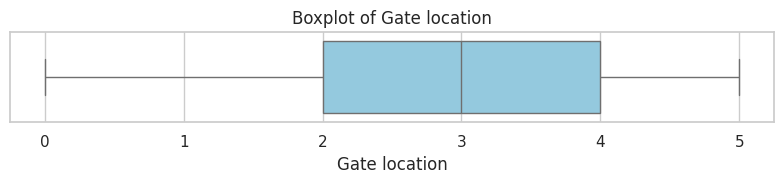

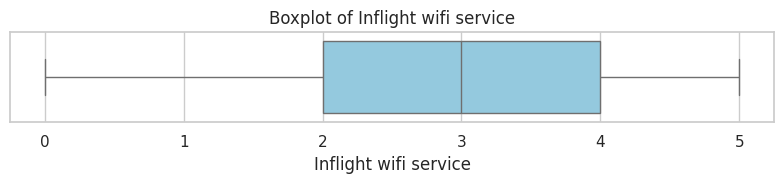

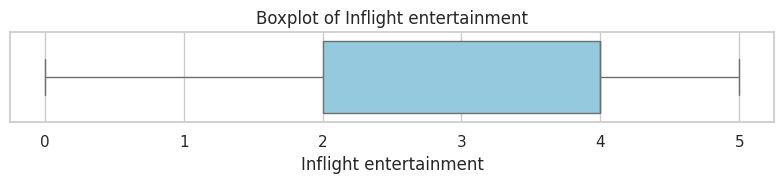

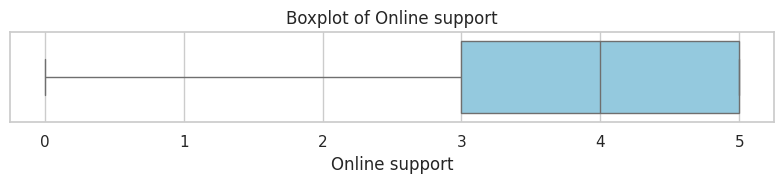

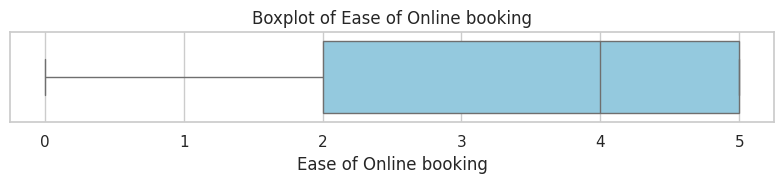

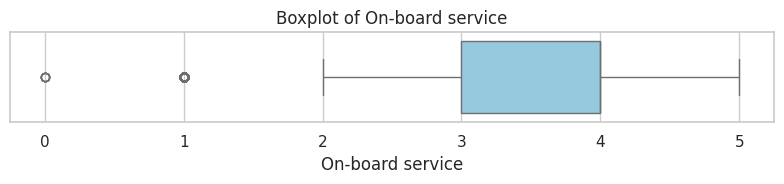

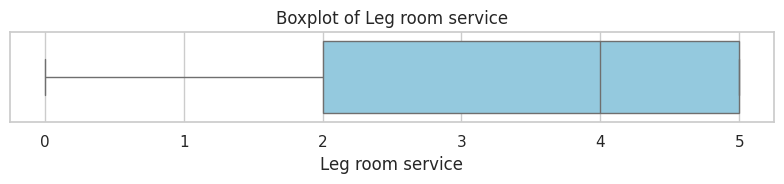

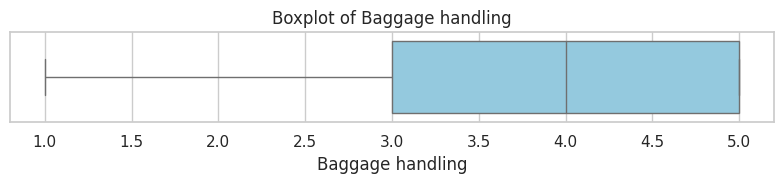

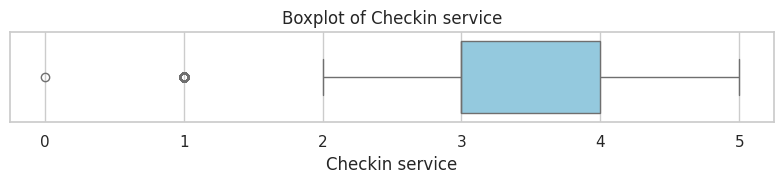

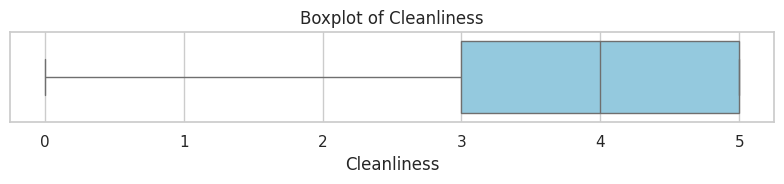

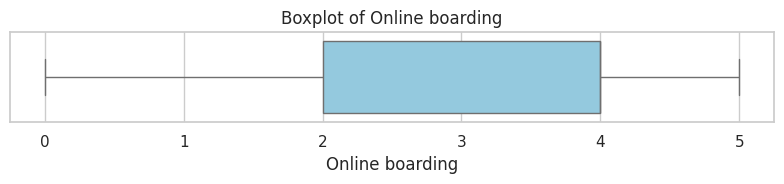

In [69]:
# Plot boxplots for each continuous variable
for col in continuous_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

<ipython-input-70-a6bdc7d8218e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


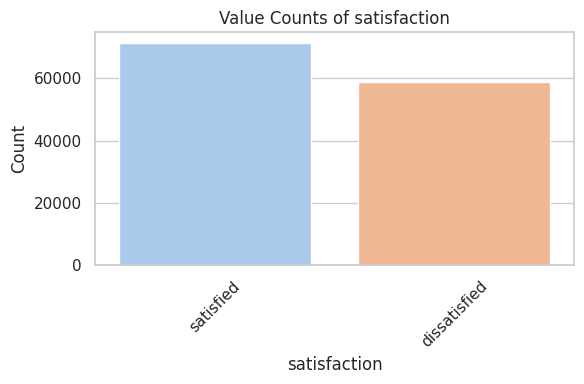

<ipython-input-70-a6bdc7d8218e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


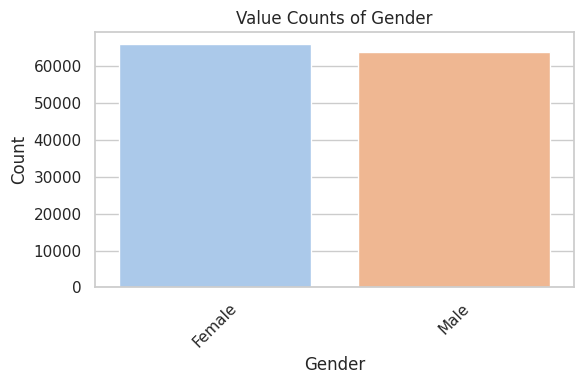

<ipython-input-70-a6bdc7d8218e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


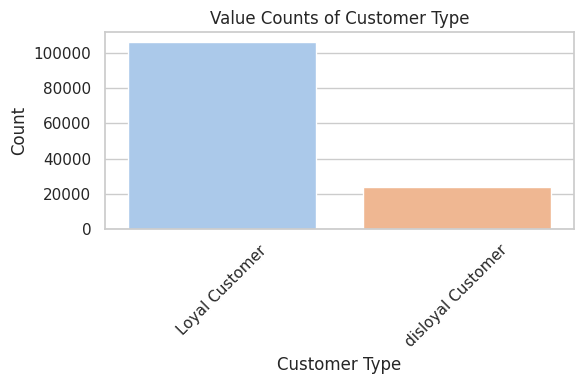

<ipython-input-70-a6bdc7d8218e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


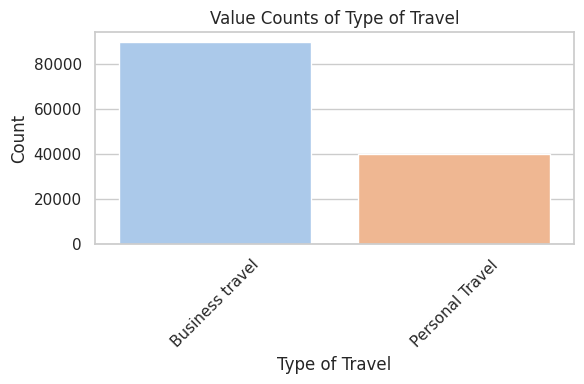

<ipython-input-70-a6bdc7d8218e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


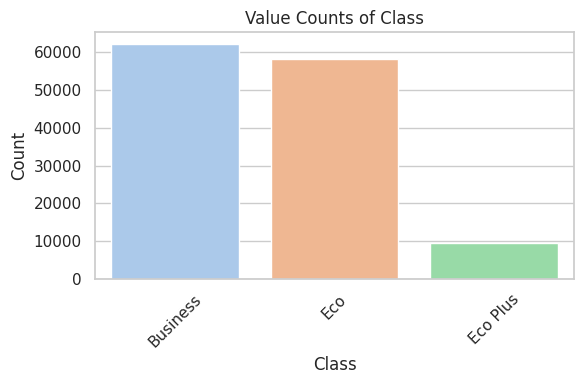

In [70]:
categorical_cols = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

# Set plot style
sns.set(style='whitegrid')

# Loop through each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


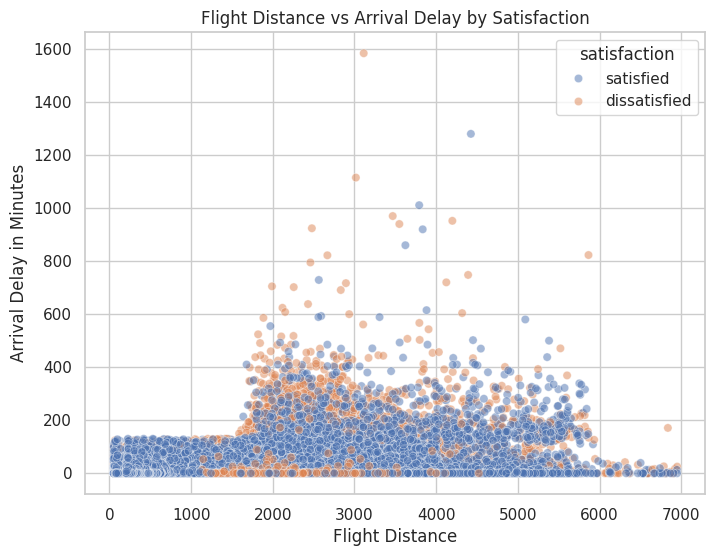

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=flight_df, x='Flight Distance', y='Arrival Delay in Minutes', hue='satisfaction', alpha=0.5)
plt.title('Flight Distance vs Arrival Delay by Satisfaction')
plt.show()

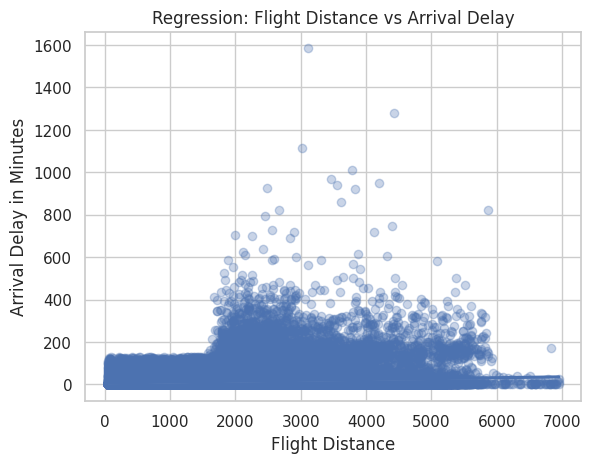

In [72]:
sns.regplot(data=flight_df, x='Flight Distance', y='Arrival Delay in Minutes', scatter_kws={'alpha':0.3})
plt.title('Regression: Flight Distance vs Arrival Delay')
plt.show()

In [73]:
from scipy.stats import pearsonr

# Drop NaNs
subset = df[['Flight Distance', 'Arrival Delay in Minutes']].dropna()

corr_coef, p_value = pearsonr(subset['Flight Distance'], subset['Arrival Delay in Minutes'])
print(f"Pearson Correlation Coefficient: {corr_coef:.3f}, p-value: {p_value:.4e}")


Pearson Correlation Coefficient: 0.110, p-value: 0.0000e+00


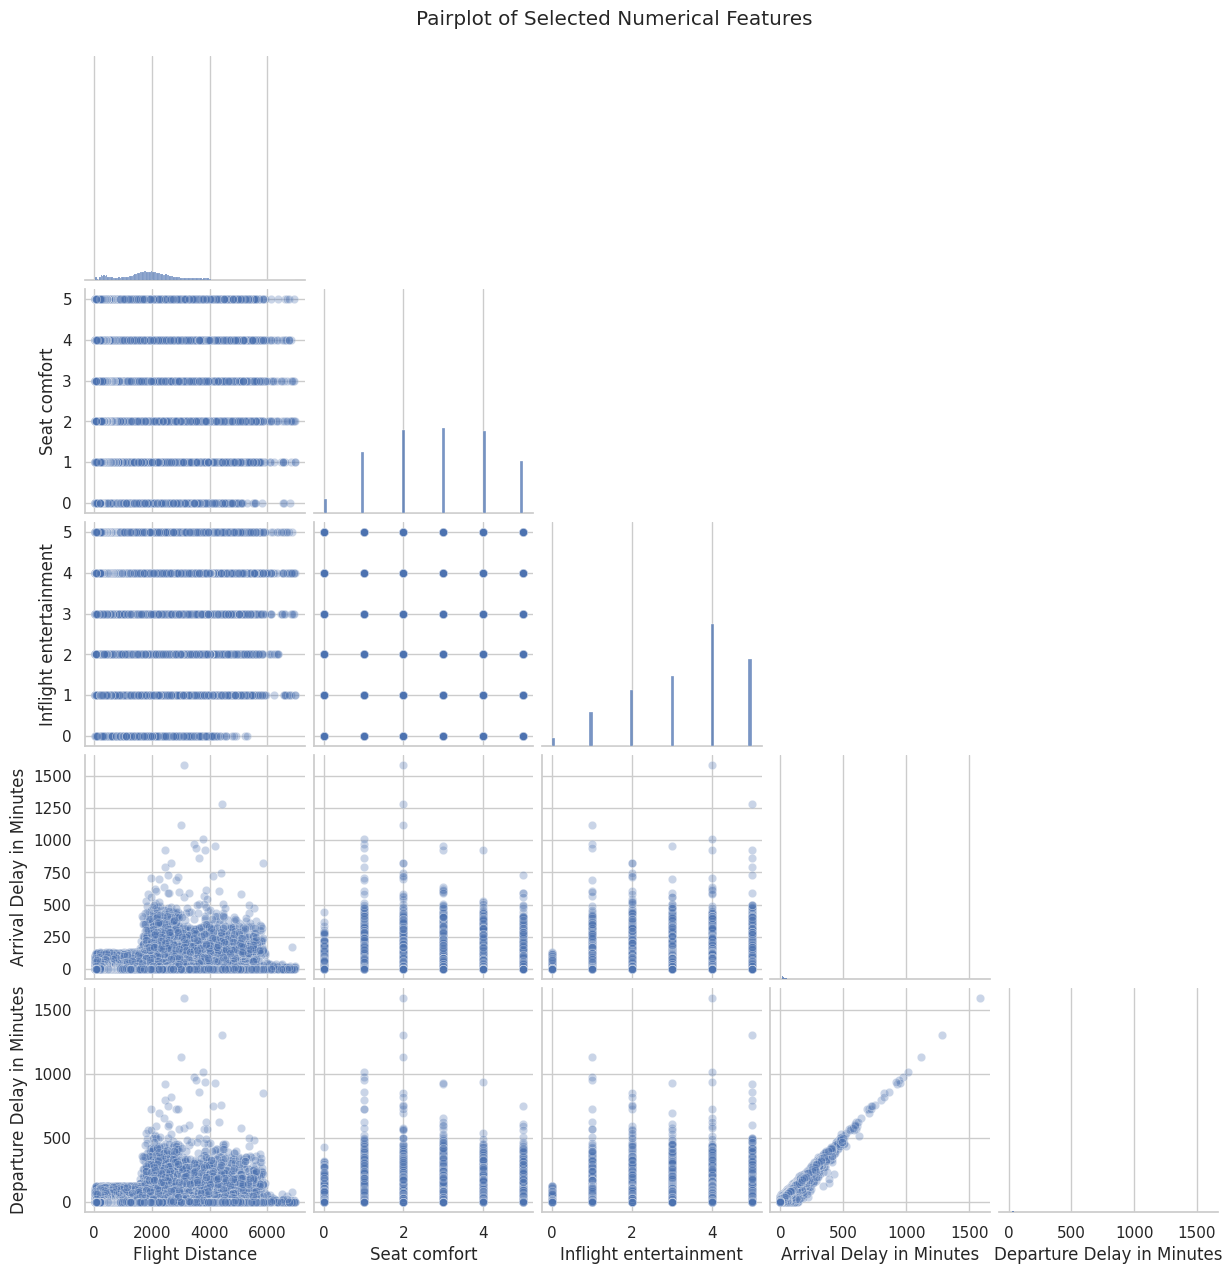

In [74]:
selected_features = [
    'Flight Distance',
    'Seat comfort',
    'Inflight entertainment',
    'Arrival Delay in Minutes',
    'Departure Delay in Minutes'
]

sns.pairplot(df[selected_features].dropna(), corner=True, plot_kws={'alpha': 0.3})
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()